In [1]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv


<img src="https://www.getzype.com/wp-content/uploads/2023/11/Check-personal-loan-status-1024x576.webp" alt="alt text">


## <div style="background-color: teal; color: purple; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>Step 1: Importing Libraries 📚</span></div>


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split ,cross_val_score,cross_validate,GridSearchCV,RandomizedSearchCV,KFold,StratifiedKFold
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score
from sklearn.preprocessing import StandardScaler ,MinMaxScaler,Normalizer,LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import missingno as mse
import plotly.express as px
from plotly.offline import iplot
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib import colors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.preprocessing import FunctionTransformer
from scipy.stats import boxcox


In [3]:
def bar_char(column):
  bar_column = (data[column].value_counts(normalize=True) * 100).sort_values(ascending=False)
  fig = px.bar(
      bar_column,
      x=bar_column.index,
      y=bar_column.values,
      color=bar_column.index.astype(str),
      title=f'{column}',
      labels={'x': f"{column}" , 'y': 'Counts'},
      text=bar_column.apply(lambda x : f"{x:.2f}%"),
      template='plotly_dark'
  )

  fig.update_traces(
      textposition="outside",
      textfont={"size": 12, "family": "consolas"}
  )

  fig.update_layout(
      xaxis=dict(
          tickmode='linear',
          dtick=1
      )
  )

  return iplot(fig)

## <div style="background-color: yellowgreen; color: red; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>Step 2: Read Data 📖</span></div>


In [4]:
data=pd.read_csv('/kaggle/input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv')
data=data.drop(columns='Loan_ID',axis=1)
data.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
53,Male,Yes,2,Graduate,No,4616,0.0,134.0,360.0,1.0,Urban,N
214,Male,Yes,0,Graduate,No,3173,3021.0,137.0,360.0,1.0,Urban,Y
310,Female,No,0,Graduate,No,2917,0.0,84.0,360.0,1.0,Semiurban,Y
304,Male,No,0,Graduate,No,4000,2500.0,140.0,360.0,1.0,Rural,Y
217,Male,Yes,0,Graduate,No,3727,1775.0,131.0,360.0,1.0,Semiurban,Y




## <div style="background-color: black; color: red; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>Step 3 : Let's Get Quick Overview 🧐😉</span></div>



In [5]:
data.shape
print(f"the number of rows in data {data.shape[0]}".title())
print(f"the number of columns in data {data.shape[1]}".title())

The Number Of Rows In Data 614
The Number Of Columns In Data 12


In [6]:
# The info data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [7]:
# The describe data ( numeric data )
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
# the describe ('Loan_Status') :
data.groupby('Loan_Status').describe()

ApplicantIncome                                                   \
                      count         mean          std    min     25%     50%   
Loan_Status                                                                    
N                     192.0  5446.078125  6819.558528  150.0  2885.0  3833.5   
Y                     422.0  5384.068720  5765.441615  210.0  2877.5  3812.5   

                              CoapplicantIncome               ...  \
                 75%      max             count         mean  ...   
Loan_Status                                                   ...   
N            5861.25  81000.0             192.0  1877.807292  ...   
Y            5771.50  63337.0             422.0  1504.516398  ...   

            Loan_Amount_Term        Credit_History                           \
                         75%    max          count      mean       std  min   
Loan_Status                                                                   
N                      360.0  480.0          179.0  0.541899  0.499639  0.0   
Y                      360.0  480.0          385.0  0.981818  0.133782  0.0   

                                 
             25%  50%  75%  max  
Loan_Status                      
N            0.0  1.0  1.0  1.0  
Y            1.0  1.0  1.0  1.0  

[2 rows x 40 columns]

In [9]:
# The Data Describe Object Data
data.describe(include='O')

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


In [10]:
# The Data Type Features :
data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## <div style="background-color: violet; color: #ff1493; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>Data Description</span></div>

<div style="background-color: black; padding: 10px;">
    <table style="color:tan;">
        <tr>
            <th>Number Of Columns</th>
            <th>Column Name</th>
            <th>Dtype</th>
        </tr>
        <tr>
            <td style="color: red;">1</td>
            <td style="color: red;">Loan_ID</td>
            <td style="color: red;">object</td>
        </tr>
        <tr>
            <td style="color: #1E96FC;">2</td>
            <td style="color:#1E96FC;">Gender</td>
            <td style="color: #1E96FC;">object</td>
        </tr>
        <tr>
            <td style="color: yellow;">3</td>
            <td style="color: yellow;">Married</td>
            <td style="color: yellow;">object</td>
        </tr>
        <tr>
            <td style="color: green;">4</td>
            <td style="color: green;">Dependents</td>
            <td style="color: green;">object</td>
        </tr>
        <tr>
            <td style="color:  #ff1493;">5</td>
            <td style="color:  #ff1493;">Education</td>
            <td style="color:  #ff1493;">object</td>
        </tr>
        <tr>
            <td style="color: #2EC4B6;" >6</td>
            <td style="color: #2EC4B6;">Self_Employed</td>
            <td style="color: #2EC4B6;">object</td>
        </tr>
        <tr>
            <td style="color: violet;">7</td>
            <td style="color: violet;">ApplicantIncome</td>
            <td style="color: violet;">int64</td>
        </tr>
        <tr>
            <td style="color: red;">8</td>
            <td style="color: red;">CoapplicantIncome</td>
            <td style="color: red;">float64</td>
        </tr>
        <tr>
            <td style="color: #33CCFF;">9</td>
            <td style="color: #33CCFF;">LoanAmount</td>
            <td style="color: #33CCFF;">float64</td>
        </tr>
            <tr>
            <td style="color: #2EC4B6;">10</td>
            <td style="color: #2EC4B6;">Loan_Amount_Term</td>
            <td style="color: #2EC4B6;">float64</td>
        </tr>
            <tr>
            <td style="color: #ff1493;">11</td>
            <td style="color: #ff1493;">Credit_History</td>
            <td style="color: #ff1493;">float64</td>
        </tr>
                  <tr>
            <td style="color: orange;">12</td>
            <td style="color: orange;">Property_Area</td>
            <td style="color: orange;">object</td>
        </tr>
          </tr>
                  <tr>
            <td style="color: orange;">13</td>
            <td style="color: orange;">Loan_Status</td>
            <td style="color: orange;">object</td>
        </tr>
    </table>
</div>



## <div style="background-color:  thistle; color: #800080; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>Step 4 : Lets Check of Null Values & Duplicates Records!!🤔</span></div>


In [11]:
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
print(f"the number of missing values in data {data.isna().sum().sum()}".title())

The Number Of Missing Values In Data 149


In [13]:
print(f"the number of duplicated in data {data.duplicated().sum()}".title())

The Number Of Duplicated In Data 0


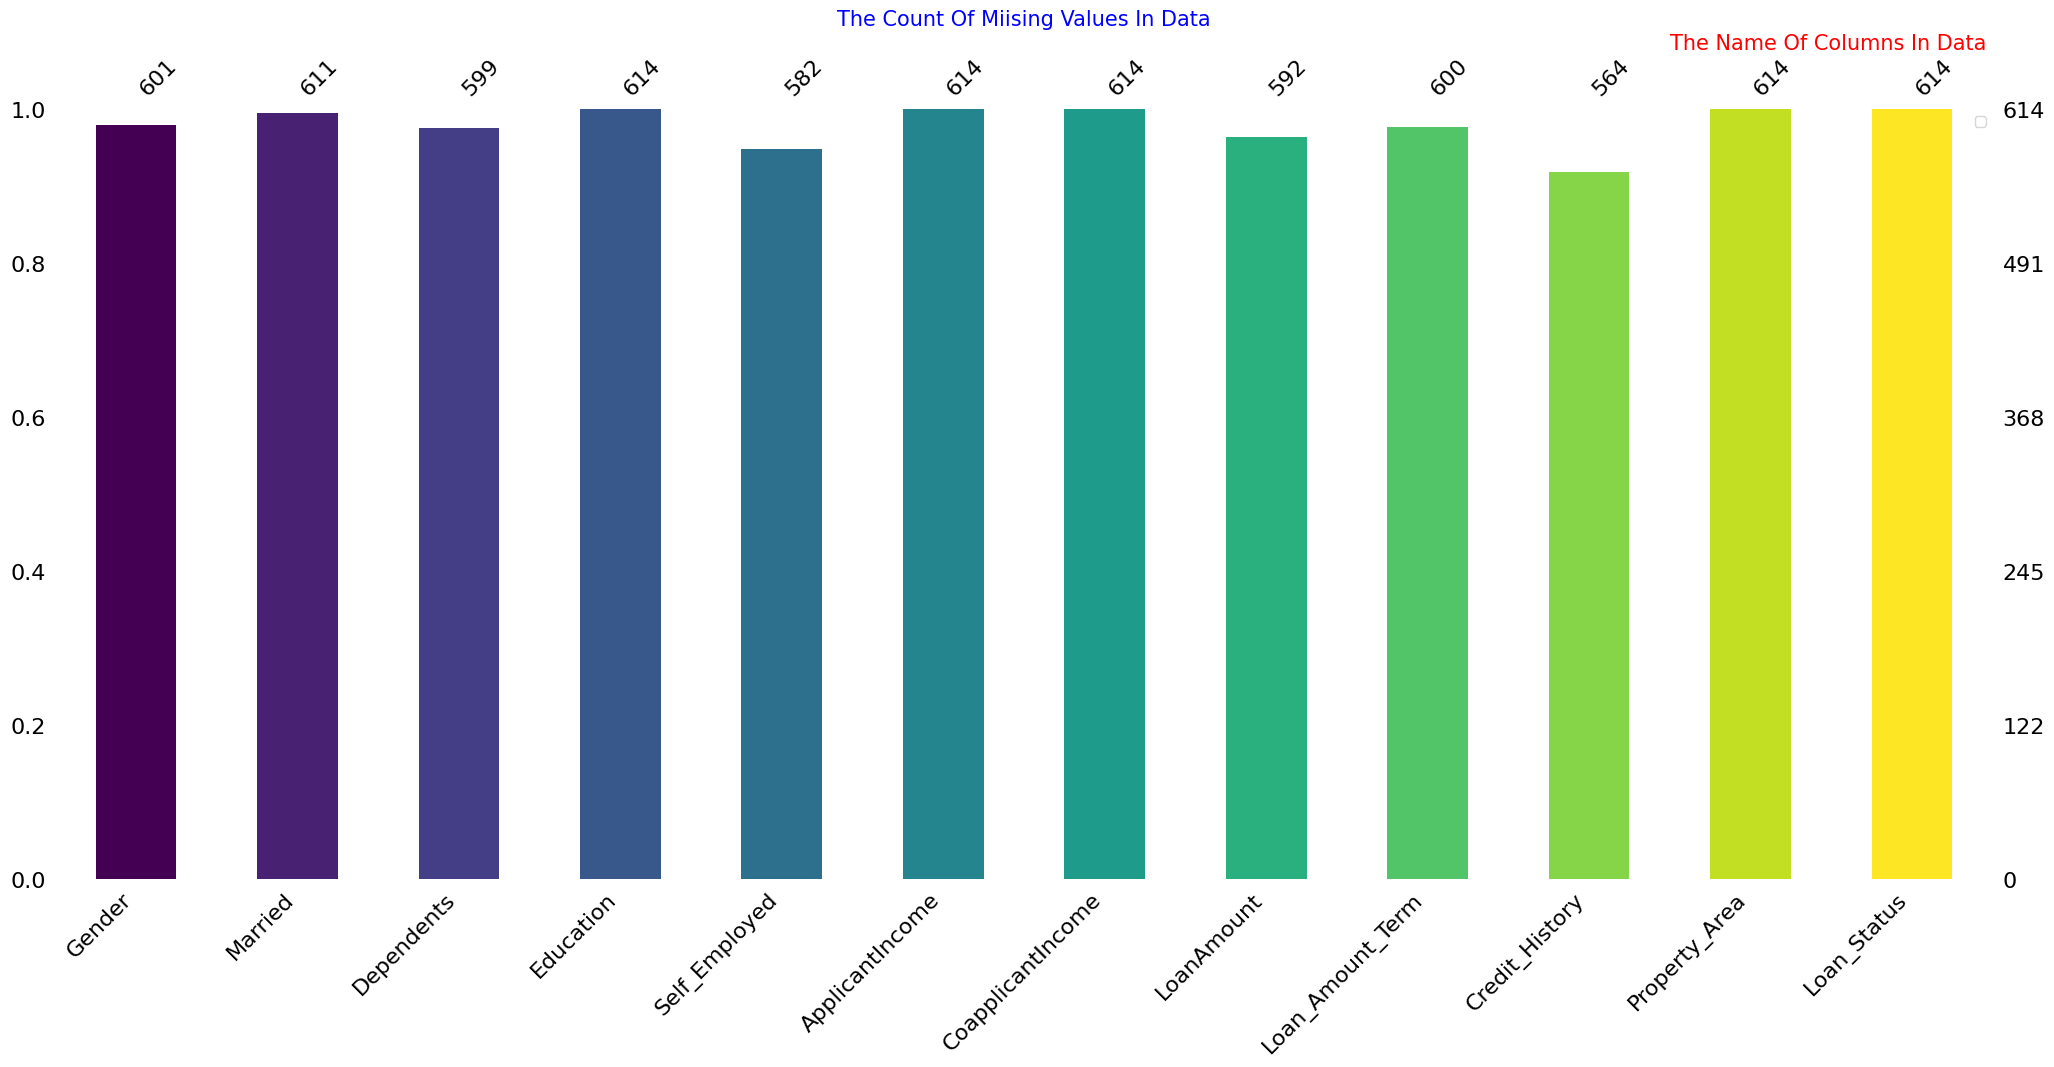

In [14]:
# visulization missing values :
len_col=len(data.columns)
color=plt.cm.viridis(np.linspace(0,1,len_col))
mse.bar(data,color=color)
plt.title("the count of miising values in data".title(),size=15,color='blue')
plt.xlabel('The name of columns in data '.title(),loc='right',size=15,color='red')
plt.legend()
plt.show()

In [15]:
def bar_char_missing_values(column):
  missing_values=(data.isna().sum()/len(data)*100).sort_values(ascending=False)
  fig = px.bar(
      missing_values,
      x=missing_values.index,
      y=missing_values.values,
      color=missing_values.index.astype(str),
      title='percentage missing values in data'.title(),
      text=missing_values.apply(lambda x : f"{x:.2f}%"),
      template='plotly_dark'
  )

  fig.update_traces(
      textposition="auto",
      textfont={"size": 15, "family": "consolas"}
  )

  fig.update_layout(
      xaxis_title='The Name of Columns',
      yaxis_title='Percentage %',
      xaxis=dict(
          tickmode='linear',
          dtick=1
      )
  )

  return iplot(fig)
bar_char_missing_values(data)


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.





## <div style="background-color: steelblue; color: red; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>Nois In Data 😦</span></div>



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



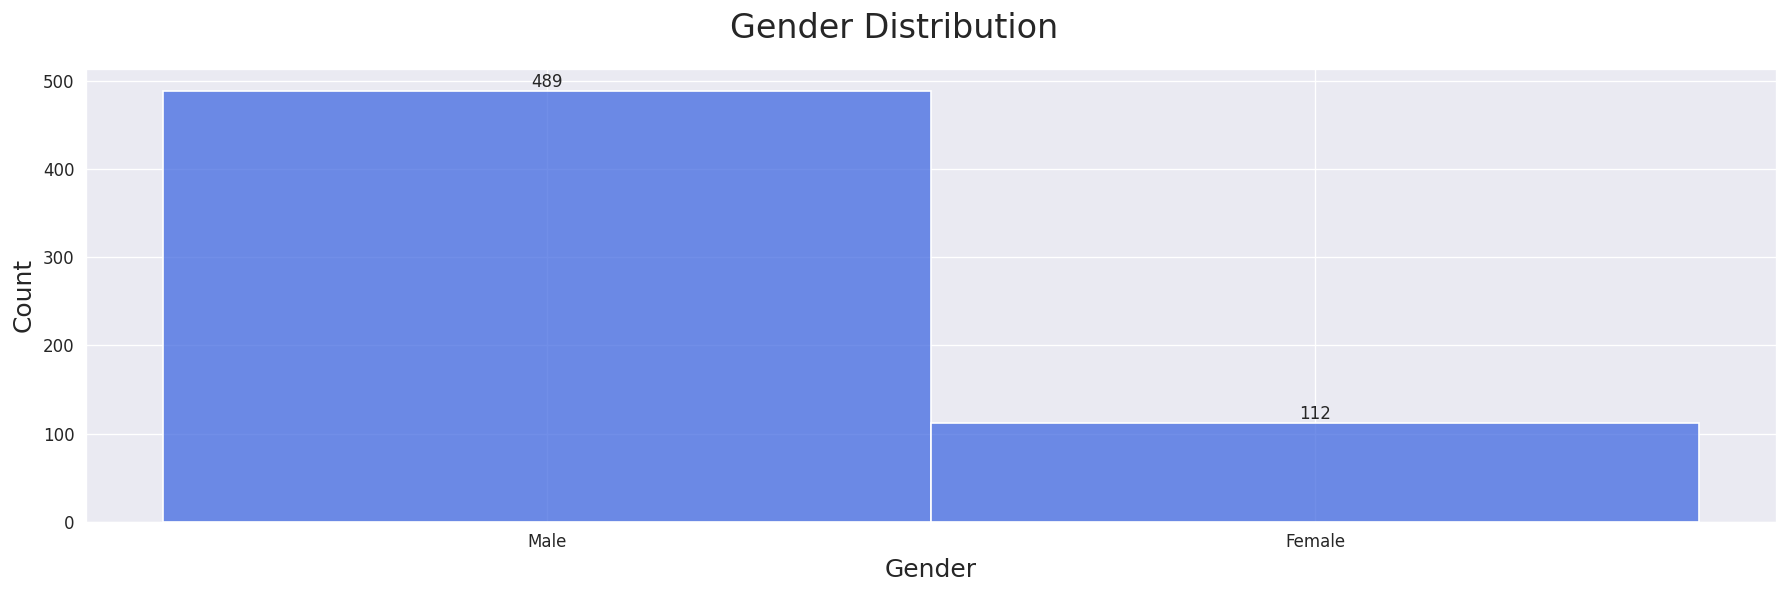

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



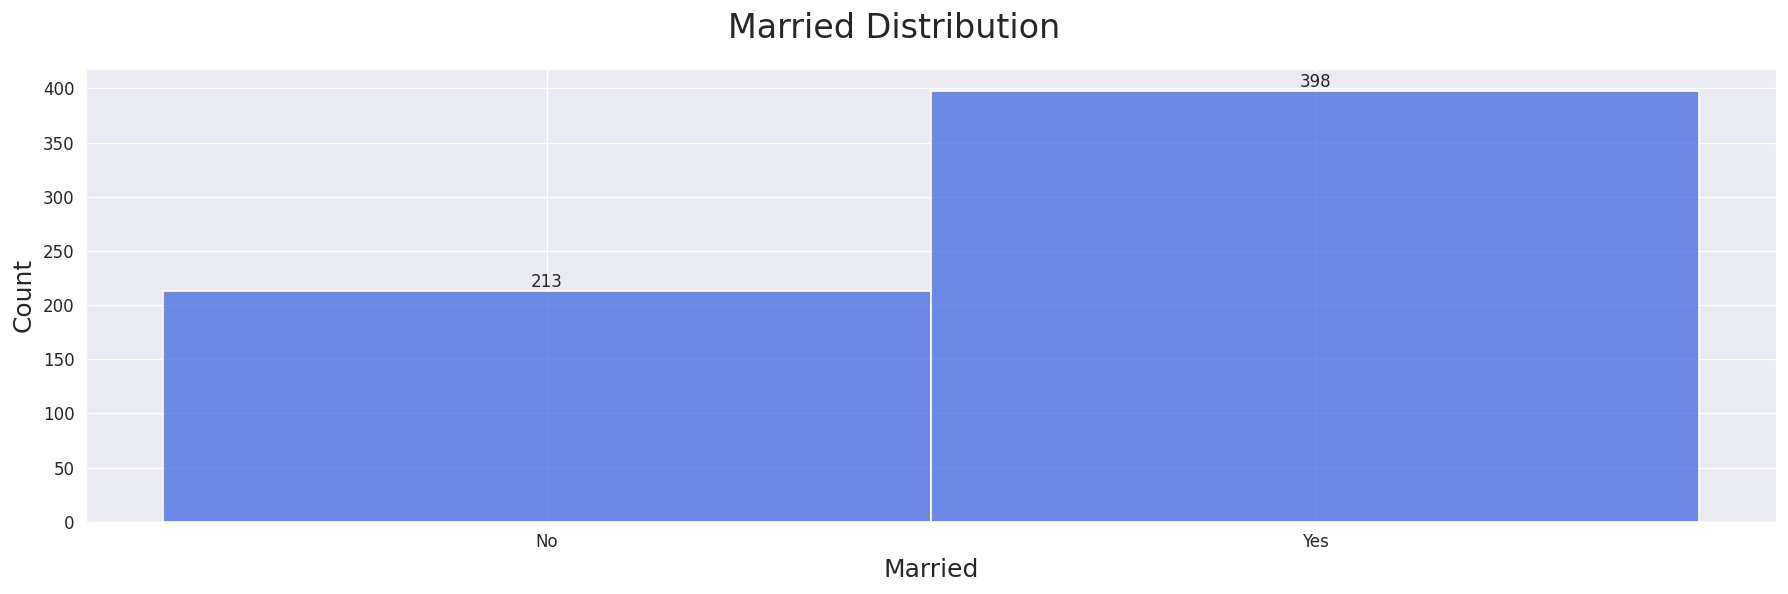

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



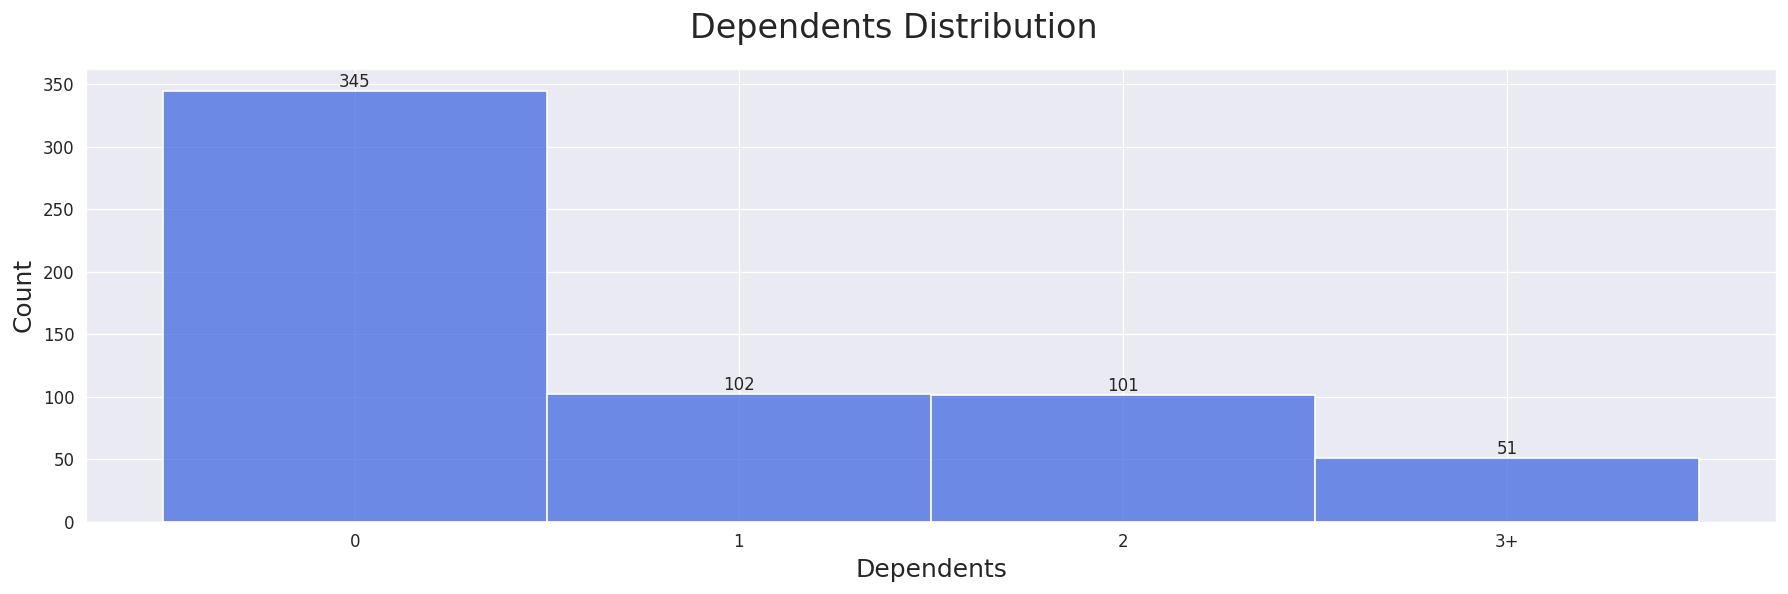

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



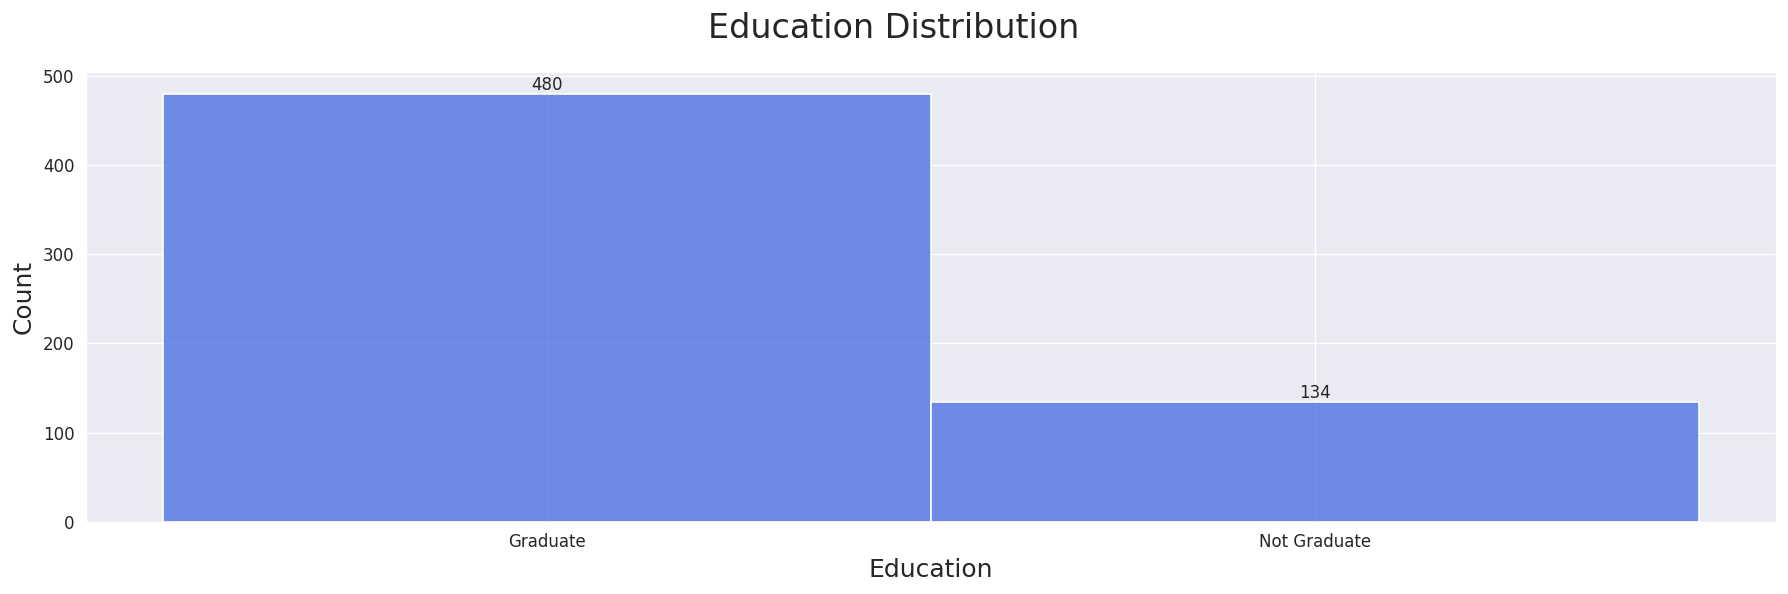

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



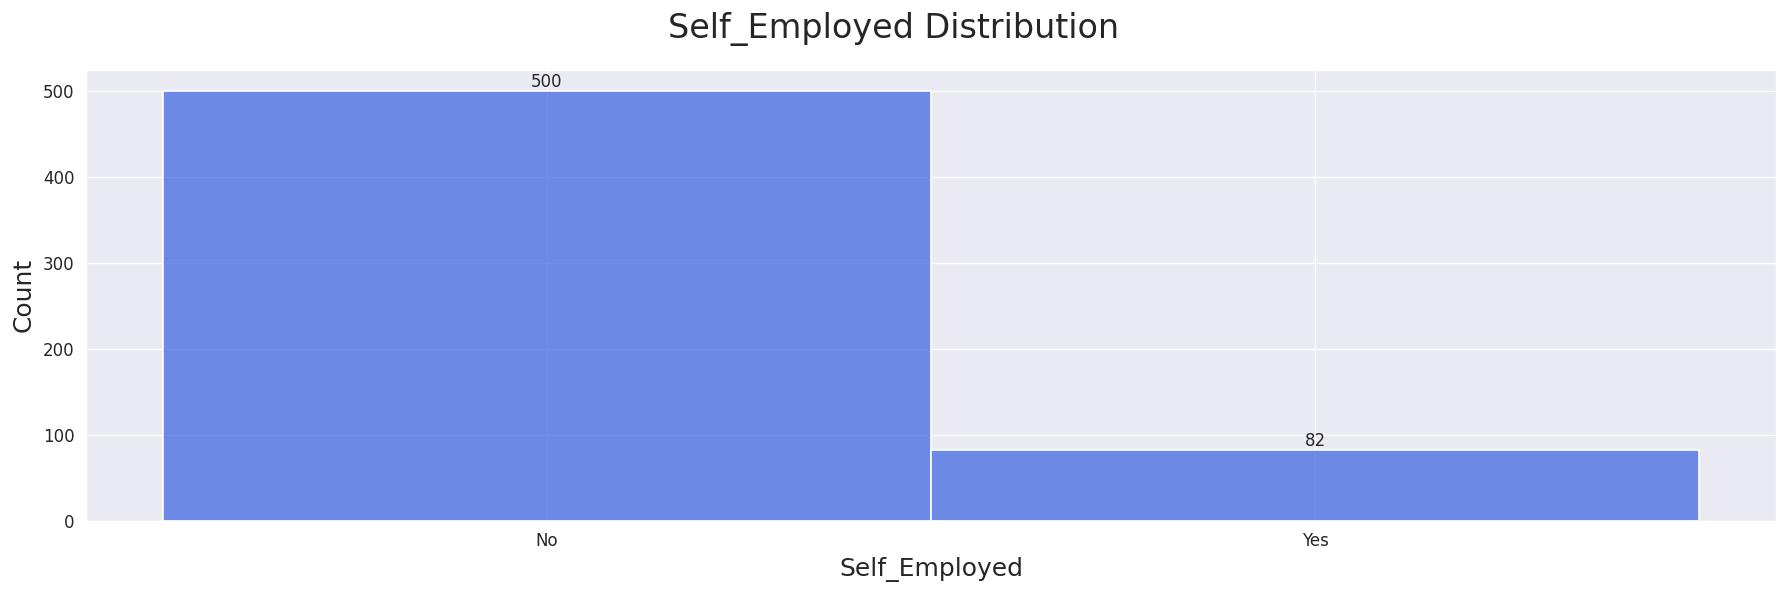

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



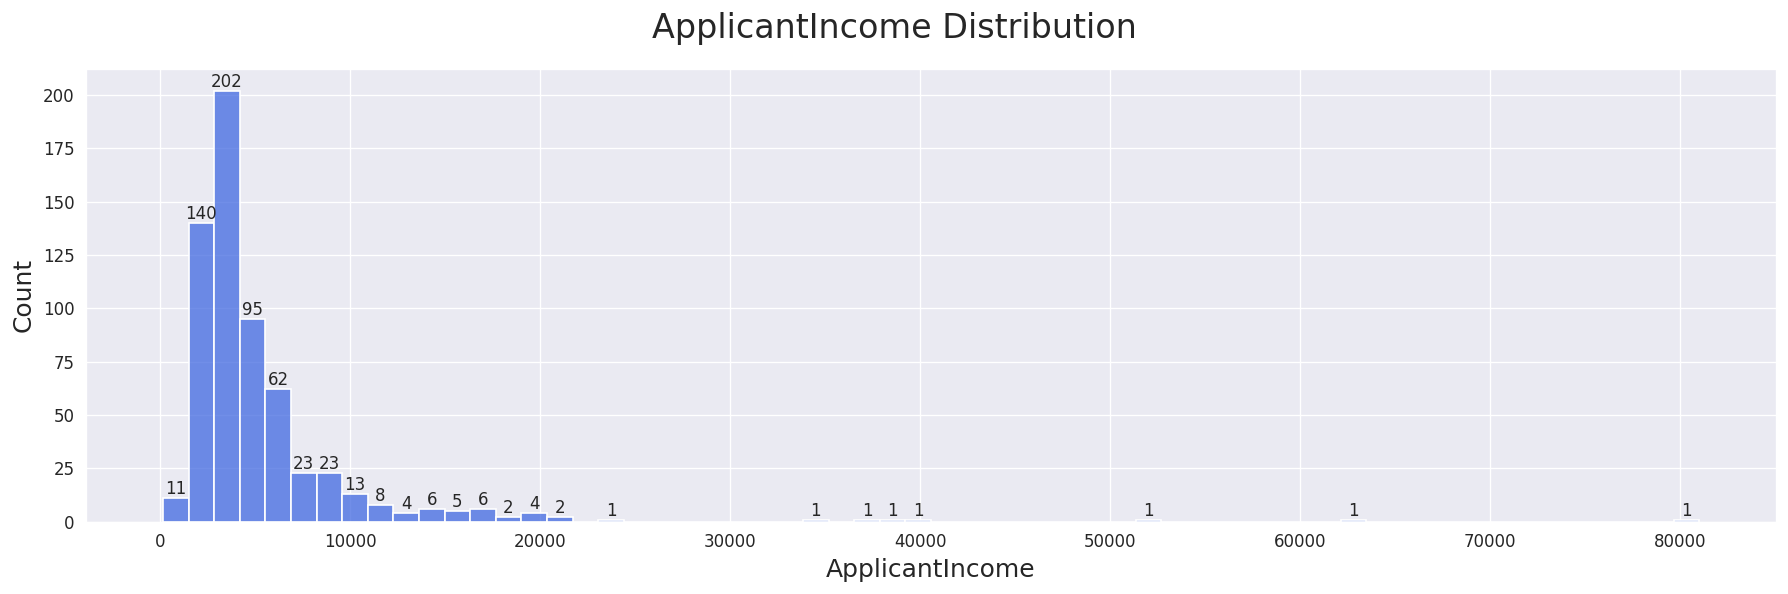

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



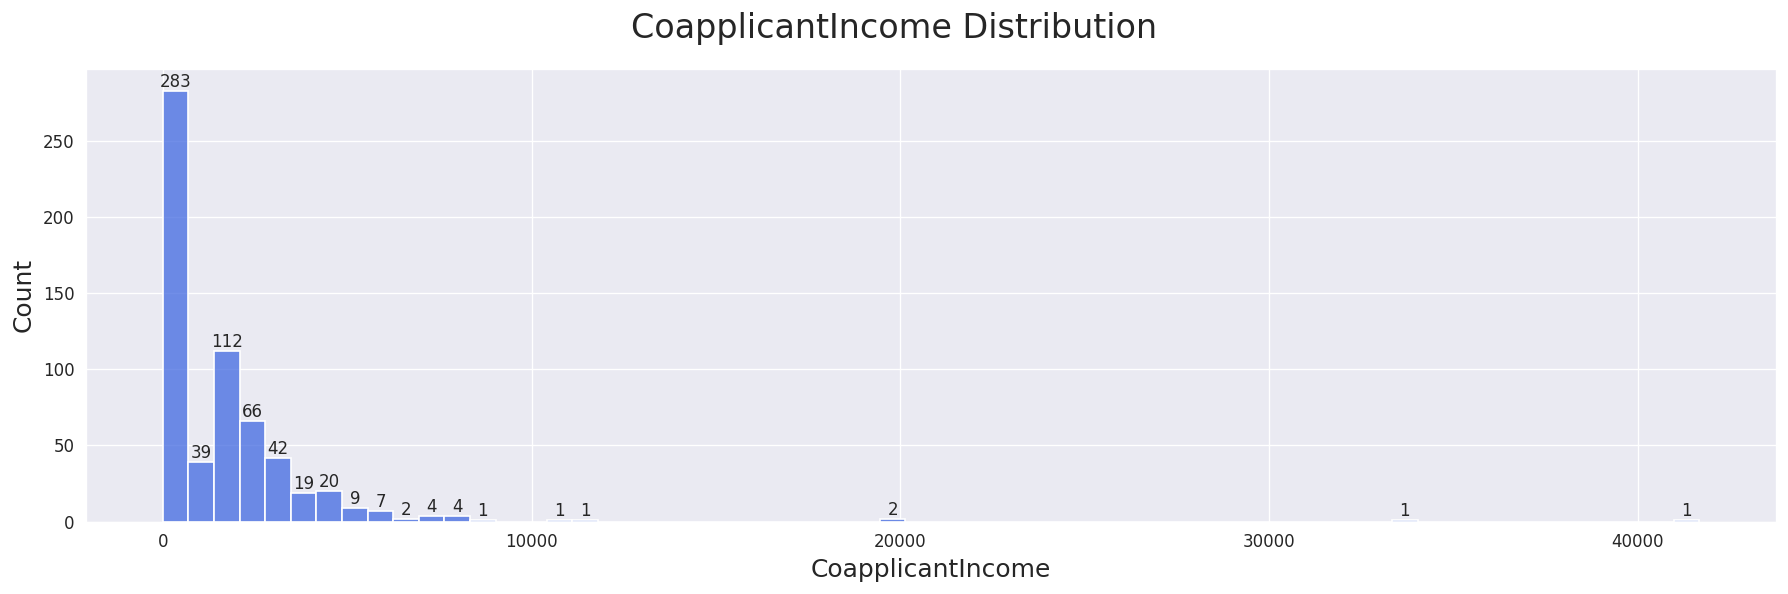

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



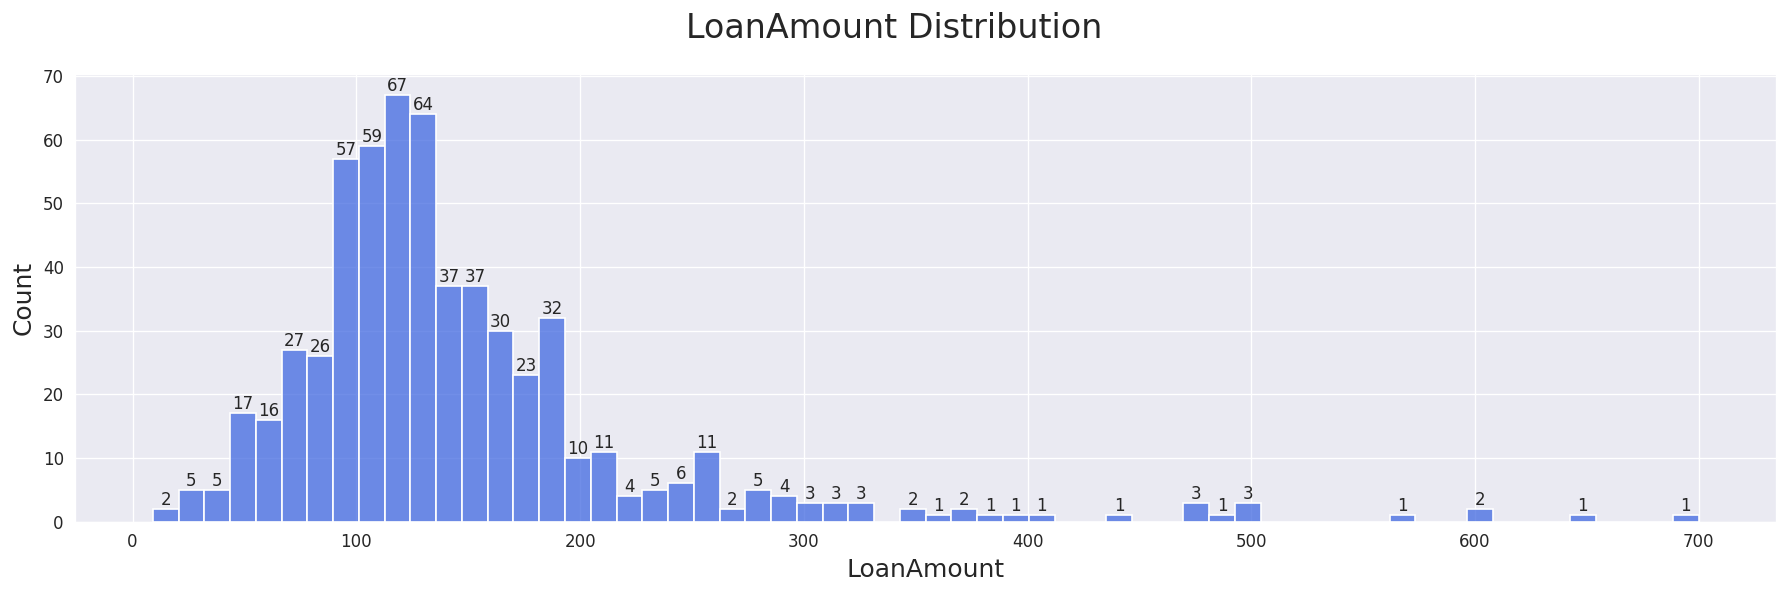

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



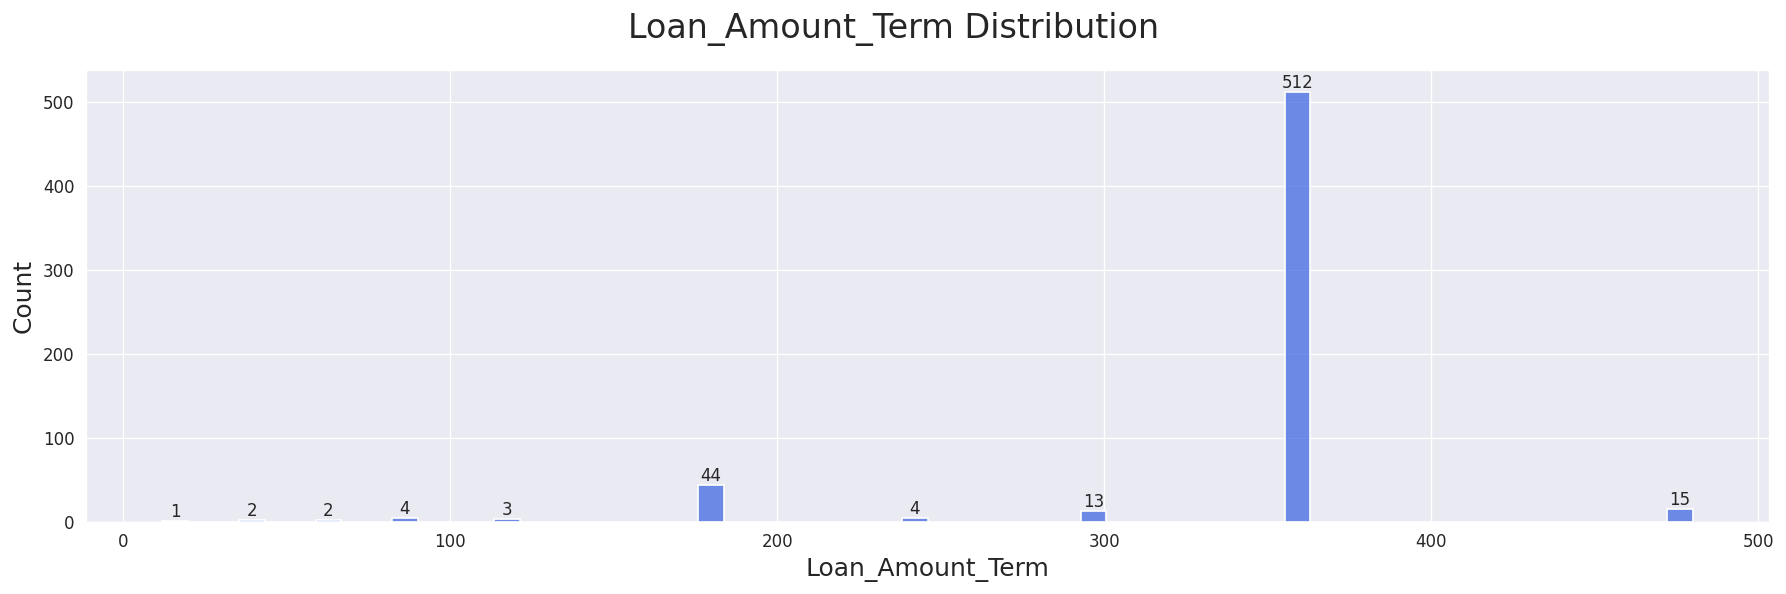

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



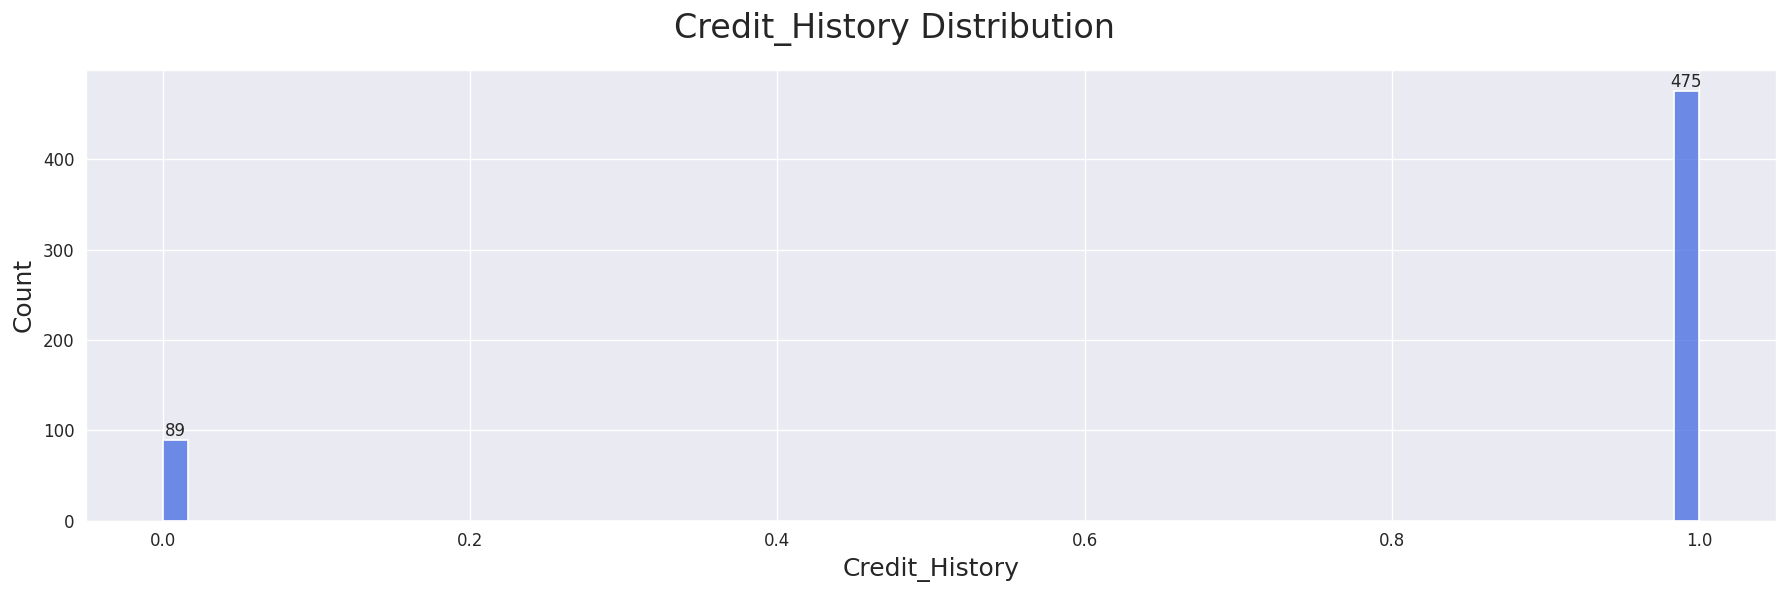

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



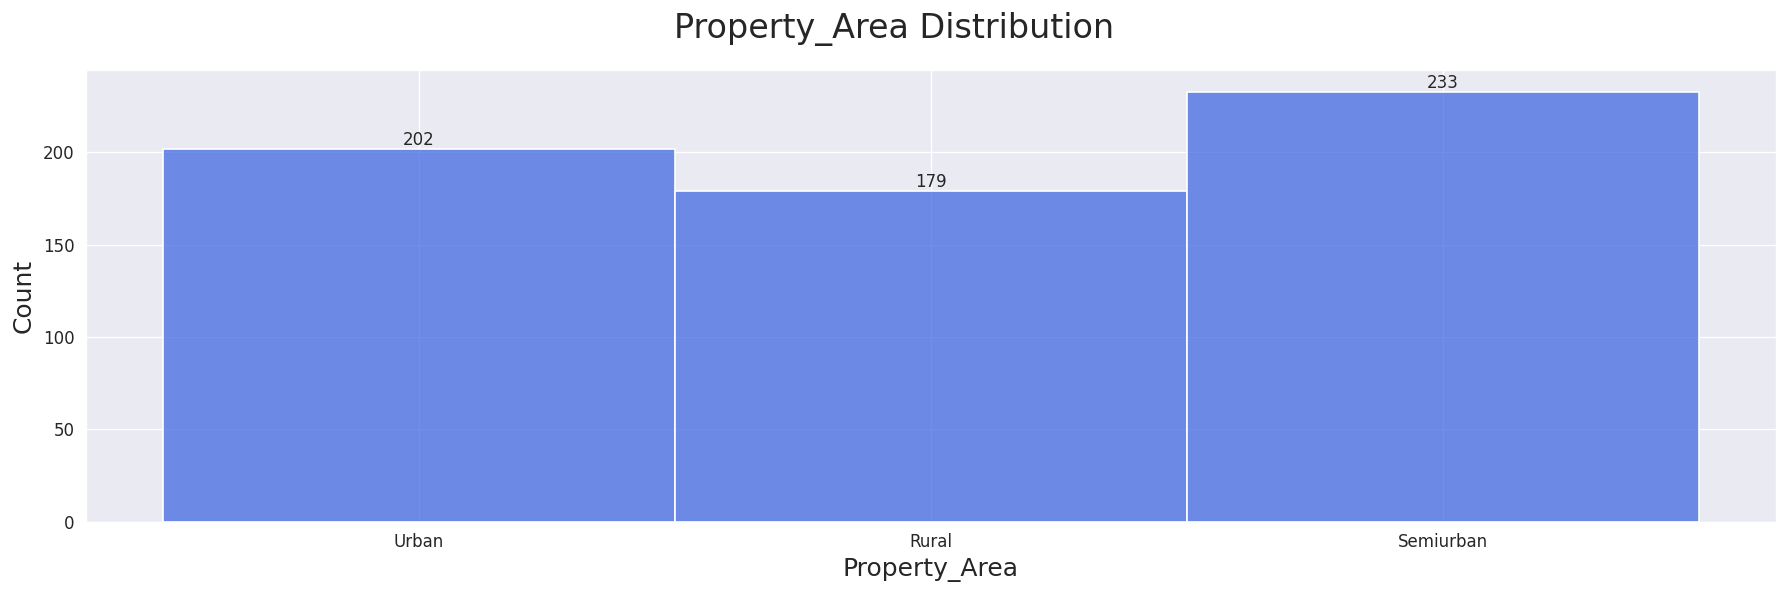

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



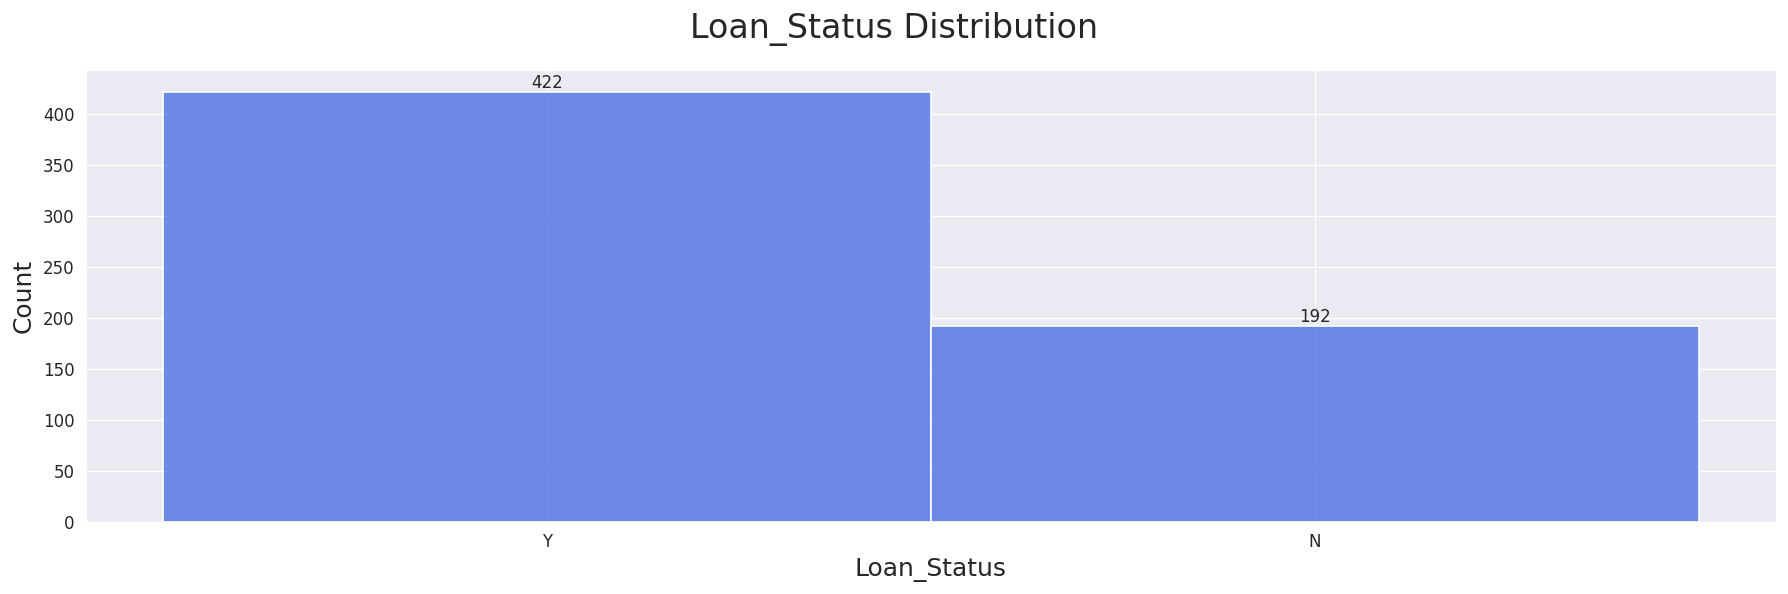

In [16]:
def noise_data(data):
  columns_numeric=data.columns
  for i in columns_numeric:
    sns.set_style('darkgrid')
    color = 'royalblue'
    plt.figure(figsize=(15,5), dpi=120)
    graph = sns.histplot(x=i, data=data, bins=60, color=color)
    labels = [str(v) if v else '' for v in graph.containers[0].datavalues]
    graph.bar_label(graph.containers[0], labels=labels)
    plt.xlabel(f"{i}", fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.suptitle(f'{i} Distribution', fontsize=20)
    plt.tight_layout()
    plt.show()
noise_data(data)

## <div style="background-color:  wheat; color: tomato; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>Step 5 :Univorte Aanlysis 📈</span></div>


In [17]:
categorical_columns = data.select_dtypes(include=['O']).columns
num_plots = len(categorical_columns)
fig = make_subplots(rows=1, cols=num_plots, specs=[[{'type': 'domain'}] * num_plots], vertical_spacing=0.01, horizontal_spacing=0.1)

for i, feature in enumerate(categorical_columns):
    value_counts = data[feature].value_counts()
    labels = value_counts.index.tolist()
    values = value_counts.values.tolist()
    cmap = colors.LinearSegmentedColormap.from_list("Purple", ["red", "white"])
    norm = colors.Normalize(vmin=0, vmax=len(labels))
    color_list = [colors.rgb2hex(cmap(norm(i))) for i in range(len(labels))]

    pie_chart = go.Pie(
        labels=labels,
        values=values,
        hole=0.6,
        marker=dict(colors=color_list, line=dict(color='white', width=3)),
        textposition='inside',
        textinfo='percent+label',
        title=feature,
        title_font=dict(size=15, color='white', family='Calibri')
    )

    fig.add_trace(pie_chart, row=1, col=i + 1)

fig.update_layout(
    showlegend=False,
    height=500,
    width=500 * num_plots,
    title={
        'text': "Distribution of Categorical Variables in Data",
        'y': 0.90,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 28, 'color': 'white', 'family': 'Calibri'}
    },
    template='plotly_dark',
    paper_bgcolor='black',
    plot_bgcolor='black'
)

fig.show()

In [18]:
#Gender
bar_char('Gender')

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [19]:
#Married
bar_char('Married')

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [20]:
#Dependent
bar_char('Dependents')

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [21]:
#the replace 3+ in Dependents 3+ to 4 :
data['Dependents'].replace({'3+':'4'},inplace=True)


/tmp/ipykernel_25/1307540298.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [22]:
#Education
bar_char('Education')

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [23]:
#Education
bar_char('Self_Employed')

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



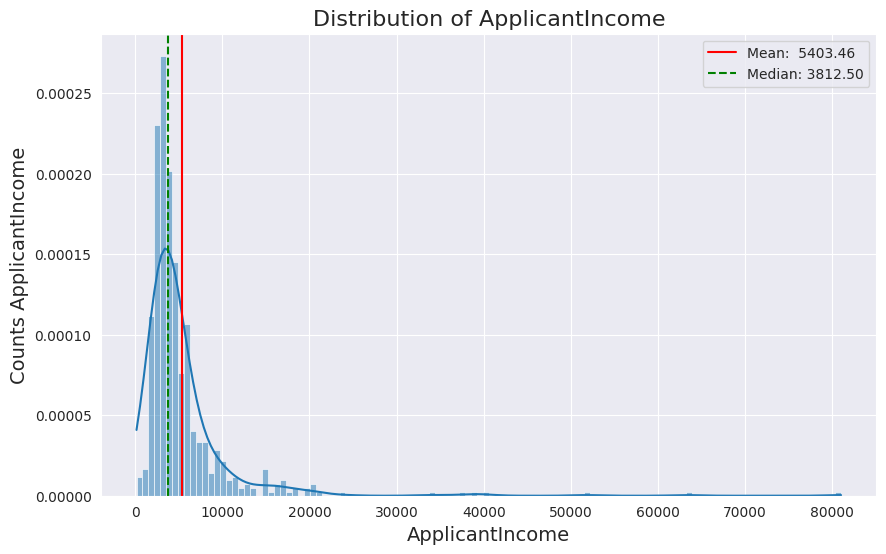

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



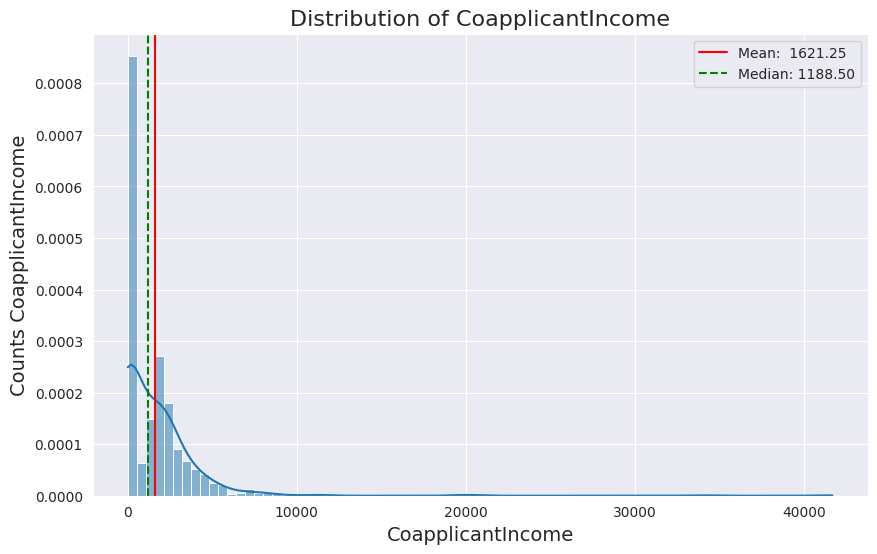

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



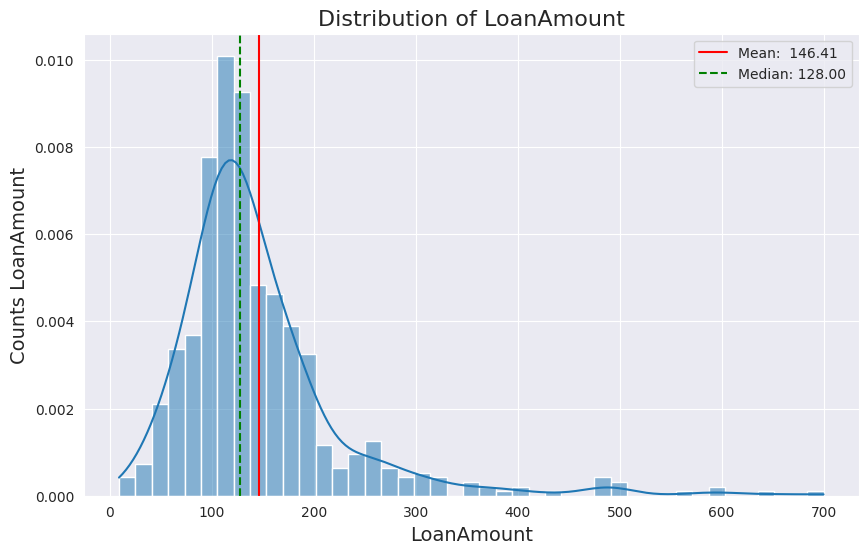

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



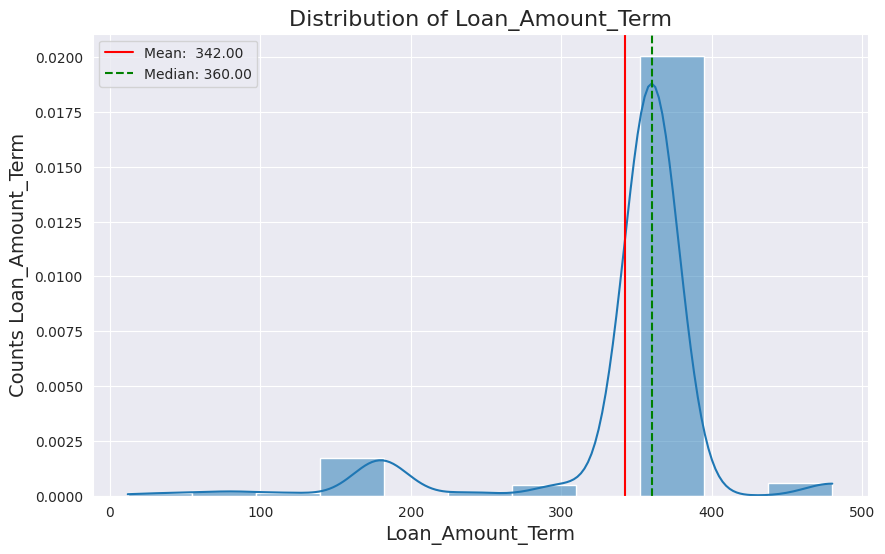

In [24]:
def hist_plot_columns(data):
    columns_numeric = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
    for column in columns_numeric:
        plt.figure(figsize=(10, 6))
        sns.histplot(data=data, x=column, kde=True, stat="density")
        mean_column = data[column].mean()
        median_column = data[column].median()
        plt.axvline(mean_column, color='r', linestyle='-', label=f"Mean:  {mean_column:.2f}")
        plt.axvline(median_column, color='g', linestyle='--', label=f"Median: {median_column:.2f}")
        plt.title(f'Distribution of {column}', fontsize=16)
        plt.xlabel(f"{column}", fontsize=14)
        plt.ylabel(f'Counts {column}', fontsize=14)
        plt.legend()
        plt.show()

hist_plot_columns(data)

In [25]:
def numeric_visualization_scatter(data):
    numeric_columns = data.select_dtypes(np.number).drop(columns=['Credit_History','Loan_Amount_Term']).columns
    for column in numeric_columns:
        fig = px.scatter(data, x=column,color='Loan_Status',
                        template='plotly_dark',symbol="Loan_Status", color_continuous_scale=["blue", "red"]
                        ,labels={'X':column,"index":'Counts'} )

        fig.show()
numeric_visualization_scatter(data)

In [26]:
def numeric_visualization_boxplot(data):
    numeric_columns = data.select_dtypes(np.number).drop(columns=['Credit_History','Loan_Amount_Term']).columns
    for column in numeric_columns:
        fig = px.box(data, x=column,
                        template='plotly_dark'
                        ,labels={'X':column,"index":'Counts'}, color_discrete_sequence=["orange"] )

        fig.show()
numeric_visualization_boxplot(data)

## <div style="background-color:  purple; color: salmon; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>Step 6 : Brivate Analysis 📊</span></div>


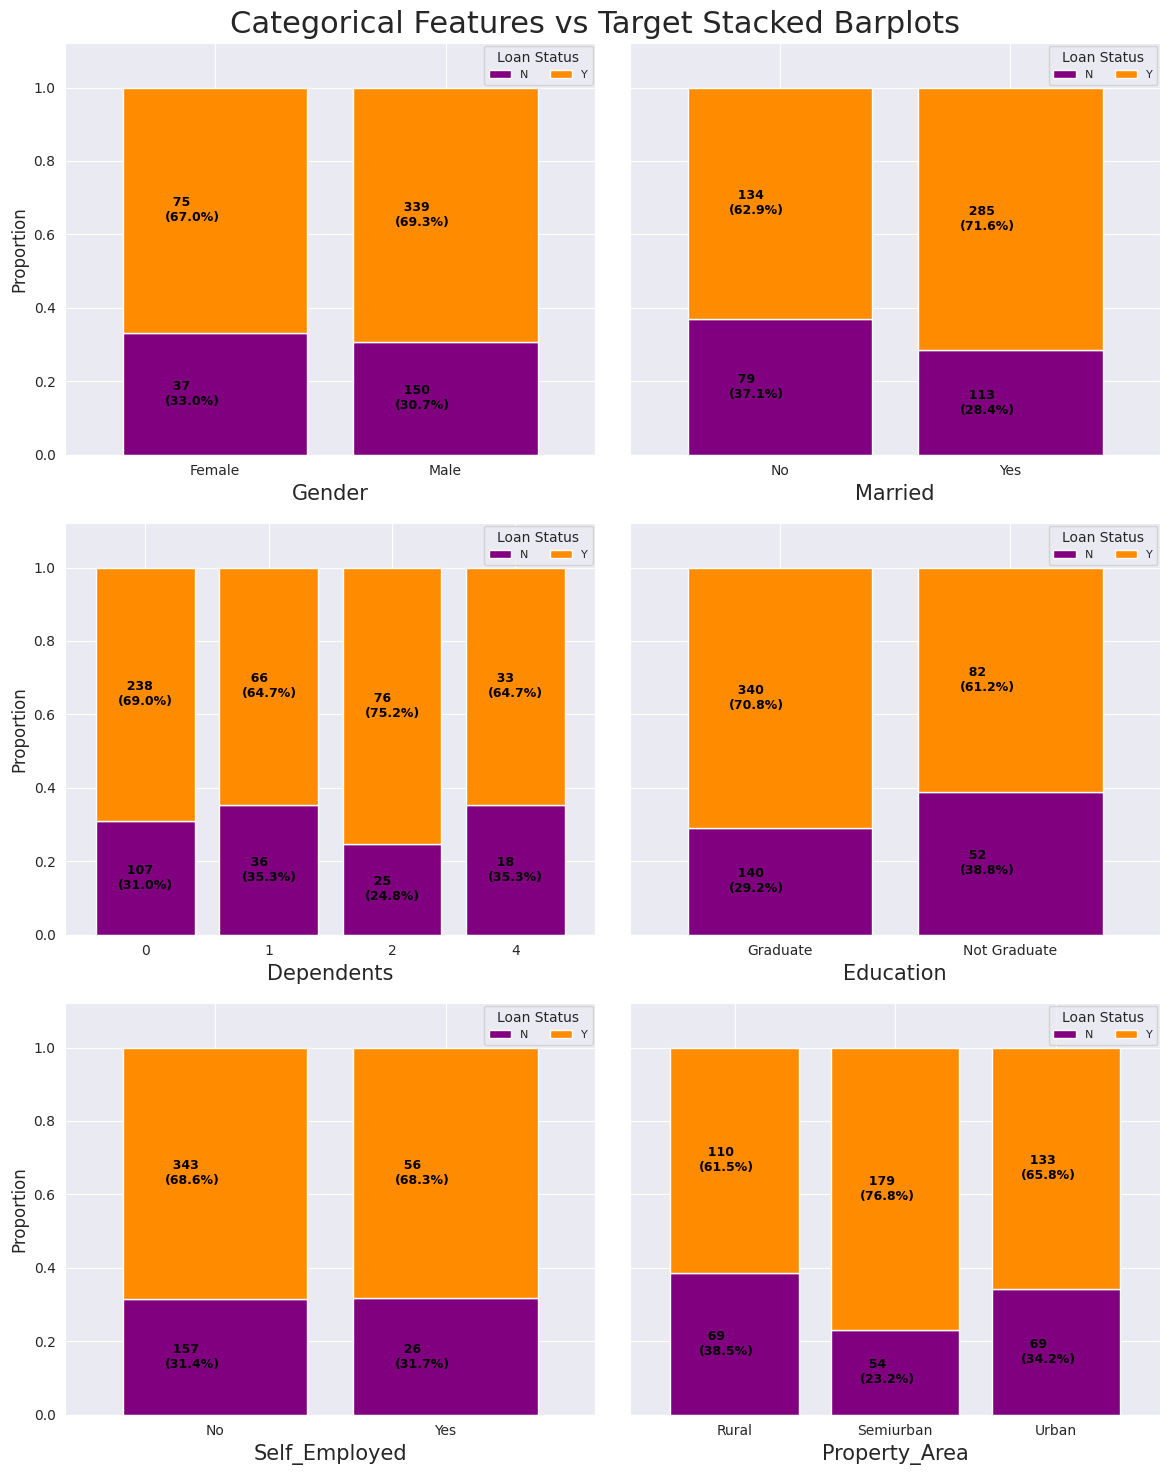

In [27]:
Cat_Features = data.select_dtypes(include=['O']).columns
Target = 'Loan_Status'
num_features = len([col for col in Cat_Features if col != Target])
rows = (num_features + 1) // 2
fig, ax = plt.subplots(nrows=rows, ncols=2, figsize=(12, rows * 5))

for i, col in enumerate(Cat_Features):
    if col == Target:
        continue

    # Create a cross tabulation showing the proportion of purchased and non-purchased loans for each category of the feature
    cross_tab = pd.crosstab(index=data[col], columns=data[Target])

    # Using the normalize=True argument gives us the index-wise proportion of the data
    cross_tab_prop = pd.crosstab(index=data[col], columns=data[Target], normalize='index')

    # Define colormap
    cmp = ListedColormap(['purple', 'darkorange'])

    # Plot stacked bar charts
    x, y = i // 2, i % 2
    cross_tab_prop.plot(kind='bar', ax=ax[x, y], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)

    # Add the proportions and counts of the individual bars to our plot
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val], cross_tab.loc[val], cross_tab_prop.loc[val].cumsum()):
            ax[x, y].text(x=idx - 0.22, y=(y_location - proportion) + (proportion / 2) - 0.03,
                          s=f'  {count}\n({np.round(proportion * 100, 1)}%)',
                          color="black", fontsize=9, fontweight="bold")

    # Add legend
    ax[x, y].legend(title='Loan Status', loc=(0.79, 0.9), fontsize=8, ncol=2)
    # Set y limit
    ax[x, y].set_ylim([0, 1.12])
    # Rotate xticks
    ax[x, y].set_xticklabels(ax[x, y].get_xticklabels(), rotation=0)
    # Increase xlabel & ylabel font sizes
    ax[x, y].set_ylabel('Proportion', fontsize=12)
    ax[x, y].set_xlabel(col, fontsize=15)

plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=22)
plt.tight_layout()
plt.show()

<Figure size 800x400 with 0 Axes>

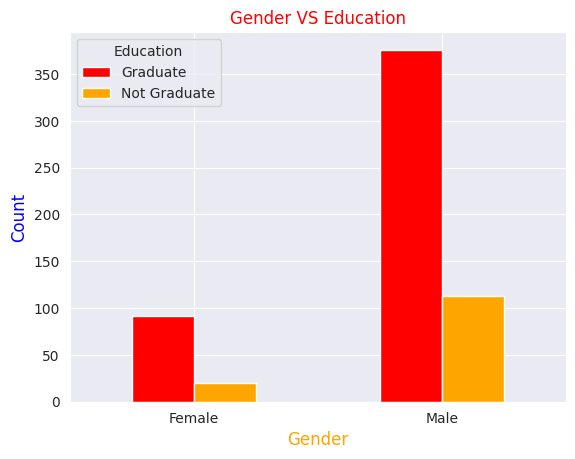

In [28]:
plt.figure(figsize=(8,4))
pd.crosstab(data['Gender'],data['Education']).plot(kind='bar',color=['red','orange'])
# Add a title to the plot
plt.title('Gender VS Education',color='red')

# Label the x-axis
plt.xlabel('Gender',color='orange',size=12)

# Label the y-axis
plt.ylabel('Count',color='blue',size=12)
plt.xticks(rotation=0)
plt.show()


<Figure size 800x400 with 0 Axes>

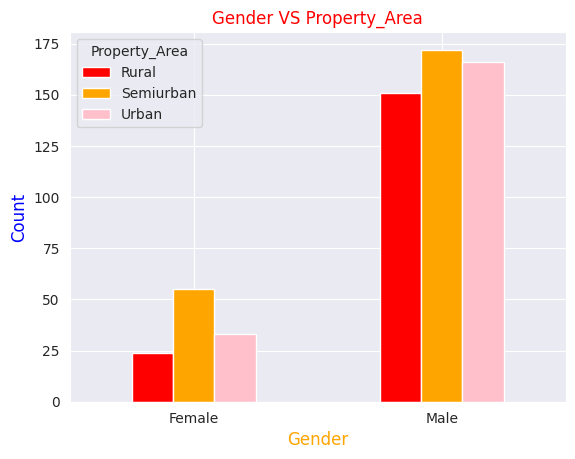

In [29]:
plt.figure(figsize=(8,4))
pd.crosstab(data['Gender'],data['Property_Area']).plot(kind='bar',color=['red','orange','pink'])
# Add a title to the plot
plt.title('Gender VS Property_Area',color='red')

# Label the x-axis
plt.xlabel('Gender',color='orange',size=12)

# Label the y-axis
plt.ylabel('Count',color='blue',size=12)
plt.xticks(rotation=0)
plt.show()


<Figure size 800x400 with 0 Axes>

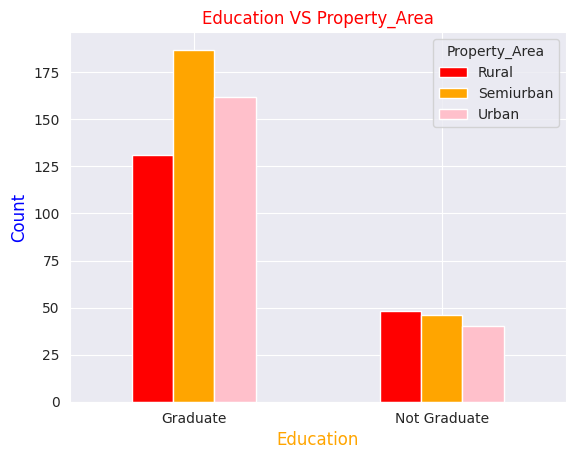

In [30]:
plt.figure(figsize=(8,4))
pd.crosstab(data['Education'],data['Property_Area']).plot(kind='bar',color=['red','orange','pink'])
# Add a title to the plot
plt.title('Education VS Property_Area',color='red')

# Label the x-axis
plt.xlabel('Education',color='orange',size=12)

# Label the y-axis
plt.ylabel('Count',color='blue',size=12)
plt.xticks(rotation=0)
plt.show()


<Figure size 800x400 with 0 Axes>

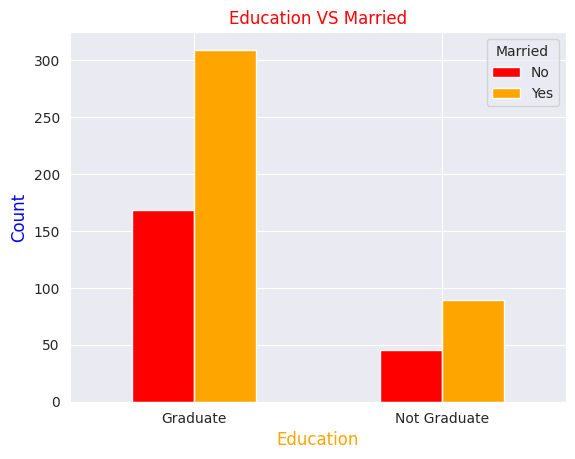

In [31]:
plt.figure(figsize=(8,4))
pd.crosstab(data['Education'],data['Married']).plot(kind='bar',color=['red','orange','pink'])
# Add a title to the plot
plt.title('Education VS Married',color='red')

# Label the x-axis
plt.xlabel('Education',color='orange',size=12)

# Label the y-axis
plt.ylabel('Count',color='blue',size=12)
plt.xticks(rotation=0)
plt.show()


In [32]:
#The relationship (ApplicantIncome,CoapplicantIncome)
fig = px.scatter(data, x='ApplicantIncome',y='CoapplicantIncome',
                        template='plotly_dark',color="Loan_Status", symbol='Loan_Status'
                        ,labels={'X':'ApplicantIncome',"index":'Counts'} )

fig.show()


In [33]:
#The relationship (ApplicantIncome,LoanAmount)
fig = px.scatter(data, x='ApplicantIncome',y='LoanAmount',
                        template='plotly_dark',color="Loan_Status", symbol='Loan_Status'
                        ,labels={'X':'ApplicantIncome',"index":'Counts'} )

fig.show()


In [34]:
#The relationship (ApplicantIncome,Loan_Amount_Term)
fig = px.scatter(data, x='ApplicantIncome',y='Loan_Amount_Term',
                        template='plotly_dark',color="Loan_Status", symbol='Loan_Status'
                        ,labels={'X':'ApplicantIncome',"index":'Counts'} )

fig.show()


In [35]:
#The relationship (CoapplicantIncome,LoanAmount)
fig = px.scatter(data, x='CoapplicantIncome',y='LoanAmount',
                        template='plotly_dark',color="Loan_Status", symbol='Loan_Status'
                        ,labels={'X':'CoapplicantIncome',"index":'Counts'} )

fig.show()


<div style="background-color:  plum; color: #800080; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>Heat Map 📃 </span></div>
  

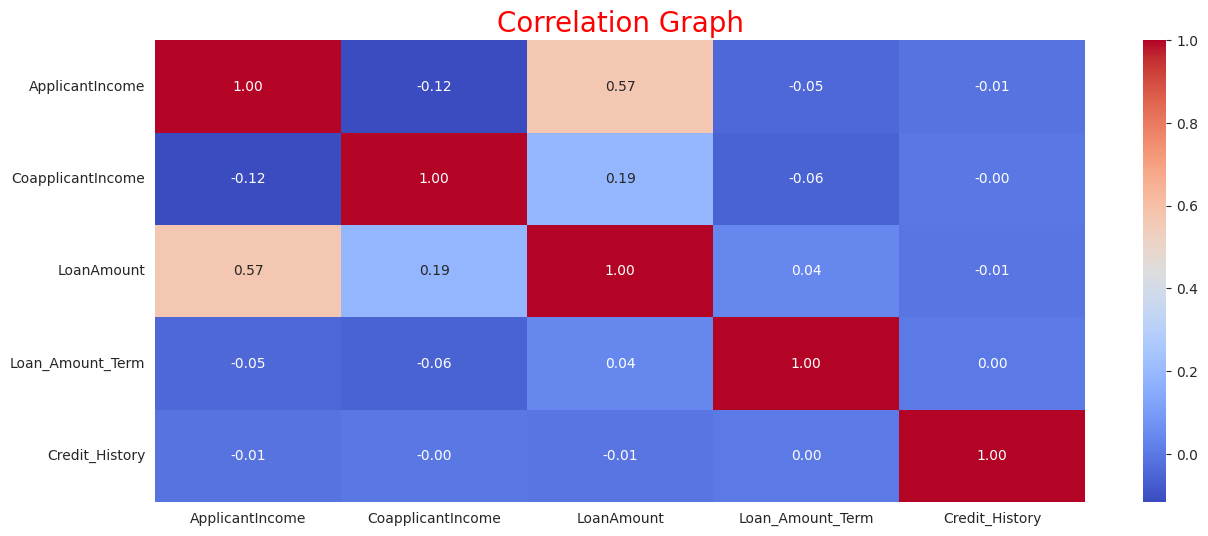

In [36]:
plt.figure(figsize=(15,6))
corr_data=data.corr(numeric_only=True)
plt.title ("Correlation Graph" , fontsize = 20,color='red' )
sns.heatmap(corr_data,annot=True, cmap="coolwarm",fmt='.2f' )
plt.show()

## <div style="background-color:  #add8e6; color: #800080; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>Step 7 :  Preprocessing Data 🛠️ ⚙️</span></div>


 <div style="background-color: darkcyan; color:purple; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>Handling_Missing_Values 🛠️ 🧹</span></div>


In [37]:
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0]).astype(int)
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mode()[0])



 <div style="background-color: palevioletred; color:rebeccapurple; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>Handling_outlires 🛠️ ☠️</span></div>
  

In [38]:
def remove_outliers_iqr(data,columns):
    for column in columns:
        Q1=data[column].quantile(.25)
        Q3=data[column].quantile(.75)
        IQR=Q3-Q1
        lower_bound=Q1-IQR*1.5
        upper_bounds=Q3+IQR*1.5
        data=data[(data[column]>=lower_bound)&(data[column]<=upper_bounds)]
    return data
# Columns to check for outliers
columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Remove outliers using IQR
data = remove_outliers_iqr(data, columns)

 <div style="background-color: orchid; color:rebeccapurple; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>Handling Category Data 🛠️</span></div>
  

In [39]:
data['Gender']=data['Gender'].map({'Male':1,'Female':0})
data['Married']=data['Married'].map({'Yes':1,'No':0})
data['Education']=data['Education'].map({'Graduate':1,'Not Graduate':0})
data['Self_Employed']=data['Self_Employed'].map({'Yes':1,'No':0})
data['Loan_Status']=data['Loan_Status'].map({'Y':1,'N':0})
Property_Area=pd.get_dummies(data['Property_Area'],dtype=int)
data=pd.concat([data,Property_Area],axis=1)
data.drop(columns=['Property_Area'],axis=1,inplace=True)

 <div style="background-color: midnightblue; color:orangered; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>Features Engineering Math Transform (Convert skewed right to Normal distribution )🛠️ ⚙️ </span></div>
   

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



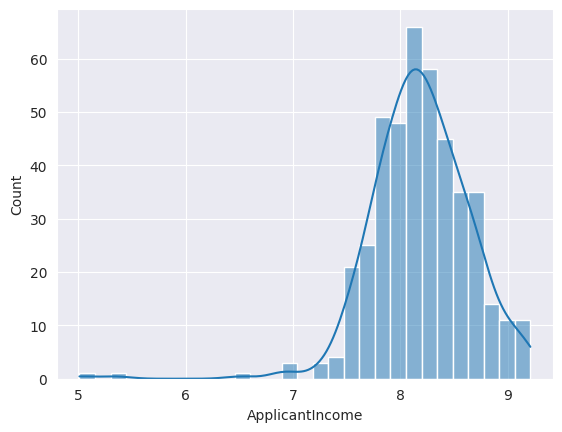

In [40]:
sns.histplot(data=data,x=np.log(data['ApplicantIncome']),kde=True)
plt.show()
data['ApplicantIncome_transform']=np.log(data['ApplicantIncome'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='CoapplicantIncome_transform', ylabel='Count'>

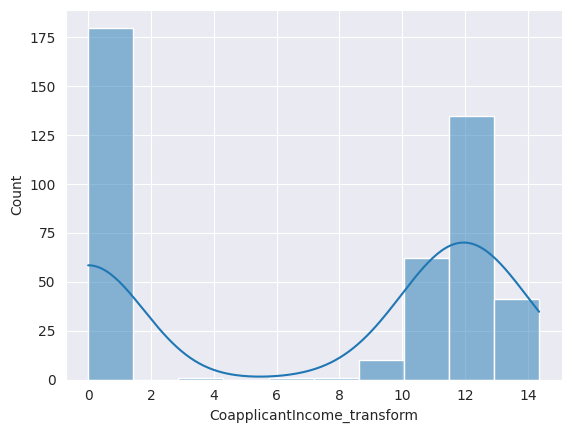

In [41]:
data[f'CoapplicantIncome_transform'], _ = boxcox(data['CoapplicantIncome'] + 1)
plt.show()
sns.histplot(data=data,x='CoapplicantIncome_transform',kde=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



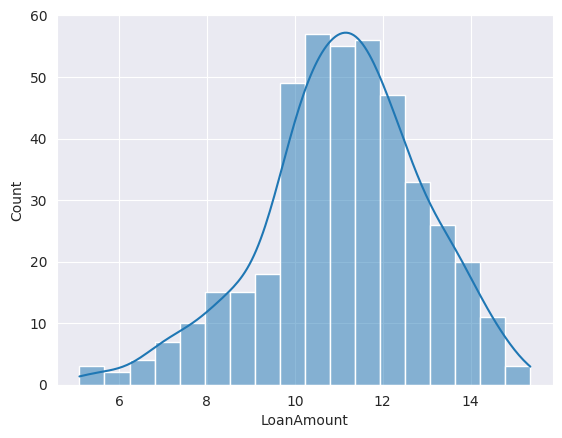

In [42]:
sns.histplot(data=data,x=data['LoanAmount']**(1/2),kde=True)
plt.show()
data['LoanAmount_transform']=data['LoanAmount']**(1/2)

In [43]:
# drop columns in data after Convert skewed right to Normal distribution
data_trans=data.drop(columns=['ApplicantIncome','CoapplicantIncome','LoanAmount'],axis=1)


### <div style="background-color:  mediumslateblue	; color: #800080; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>Train And Test Data Use Hold Out ✂️ </span></div>


In [44]:
x=data_trans.iloc[:,:].drop(columns=['Loan_Status'],axis=1)
y=data_trans.loc[:,'Loan_Status']
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.15,random_state=44,shuffle=True,stratify=y)

 <div style="background-color: lightseagreen; color:rebeccapurple; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>StandardScaler 🛠️ ⚖️</span></div>
    

In [45]:
stand_scaler_=StandardScaler()
X_train[['ApplicantIncome_transform','CoapplicantIncome_transform','LoanAmount_transform','Loan_Amount_Term']]=stand_scaler_.fit_transform(X_train[['ApplicantIncome_transform','CoapplicantIncome_transform','LoanAmount_transform','Loan_Amount_Term']])
X_test[['ApplicantIncome_transform','CoapplicantIncome_transform','LoanAmount_transform','Loan_Amount_Term']]=stand_scaler_.transform(X_test[['ApplicantIncome_transform','CoapplicantIncome_transform','LoanAmount_transform','Loan_Amount_Term']])


## <div style="background-color:  lightblue; color: #800080; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>Step 8 : Evaluate the Machine Learning Models 📃 🚀</span></div>
  

 <div style="background-color: mediumaquamarine; color:rebeccapurple; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>1.1 LOGISTIC REGRESSION </span></div>
    

In [46]:
parmeters={ 'C': [100,10, 1.0, 0.1, 0.001, 0.001],
}
lgr=LogisticRegression()
model_lgr=GridSearchCV(estimator=lgr,param_grid=parmeters,cv=StratifiedKFold(n_splits=5,random_state=44,shuffle=True))
model_lgr.fit(X_train,y_train)
y_predict_train=model_lgr.predict(X_train)
y_predict_test=model_lgr.predict(X_test)
y_prob=model_lgr.predict_proba(X_test)[:,1]
Auc=roc_auc_score(y_test,y_prob).round(2)
accuracy_score_lgr_train=accuracy_score(y_predict_train,y_train).round(2)
accuracy_score_lgr_test=accuracy_score(y_predict_test,y_test).round(2)
print(f'The accuracy data train : {accuracy_score_lgr_train}'.title())
print("*"*len(f'The accuracy data train : {accuracy_score(y_predict_train,y_train)}'.title()))
print(f'The accuracy data test : {accuracy_score_lgr_test}'.title())
print("*"*len(f'The accuracy data train : {accuracy_score(y_predict_train,y_train)}'.title()))
print(f"The roc curv score : {Auc}".title())
print("*"*len(f'The accuracy data train : {accuracy_score(y_predict_train,y_train)}'.title()))
print(classification_report(y_predict_test,y_test))


The Accuracy Data Train : 0.82
********************************************
The Accuracy Data Test : 0.88
********************************************
The Roc Curv Score : 0.89
********************************************
              precision    recall  f1-score   support

           0       0.61      0.92      0.73        12
           1       0.98      0.87      0.92        53

    accuracy                           0.88        65
   macro avg       0.79      0.89      0.83        65
weighted avg       0.91      0.88      0.89        65



 <div style="background-color: khaki; color:rebeccapurple; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>1.5 SVC
  </span></div>
    

In [47]:
svc=SVC(probability=True)
svc.fit(X_train,y_train)
y_predict_train=svc.predict(X_train)
y_predict_test=svc.predict(X_test)
y_prob=svc.predict_proba(X_test)[:,1]
Auc=roc_auc_score(y_test,y_prob).round(2)
accuracy_score_svc_train=accuracy_score(y_predict_train,y_train).round(2)
accuracy_score_svc_test=accuracy_score(y_predict_test,y_test).round(2)
print(f'The accuracy data train : {accuracy_score_svc_train}'.title())
print("*"*len(f'The accuracy data train : {accuracy_score(y_predict_train,y_train)}'.title()))
print(f'The accuracy data tese : {accuracy_score_svc_test}'.title())
print("*"*len(f'The accuracy data train : {accuracy_score(y_predict_train,y_train)}'.title()))
print(f"The roc curv score : {Auc}".title())
print("*"*len(f'The accuracy data train : {accuracy_score(y_predict_train,y_train)}'.title()))
print(classification_report(y_predict_test,y_test))


The Accuracy Data Train : 0.82
********************************************
The Accuracy Data Tese : 0.88
********************************************
The Roc Curv Score : 0.87
********************************************
              precision    recall  f1-score   support

           0       0.61      0.92      0.73        12
           1       0.98      0.87      0.92        53

    accuracy                           0.88        65
   macro avg       0.79      0.89      0.83        65
weighted avg       0.91      0.88      0.89        65



 <div style="background-color: indianred; color:greenyellow; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>1.4 RandomForestClassifier
  </span></div>
    

In [48]:
parmeters={
    'n_estimators': [100,150, 200, 300, 500],
    'min_samples_split': [5, 10, 15],
    'max_depth': [5,10, 13, 15, 17, 20],
    'min_samples_leaf': [1,2, 4, 5, 6],
    'criterion': ['gini', 'entropy'],
}
RandomForestClassifier=RandomForestClassifier()
model_rfc=RandomizedSearchCV(RandomForestClassifier,param_distributions=parmeters,cv=StratifiedKFold(n_splits=5,random_state=44,shuffle=True),n_jobs=-1)
model_rfc.fit(X_train,y_train)
y_predict_train=model_rfc.predict(X_train)
y_predict_test=model_rfc.predict(X_test)
y_prob=model_rfc.predict_proba(X_test)[:,1]
Auc=roc_auc_score(y_test,y_prob).round(2)
accuracy_score_rfc_train=accuracy_score(y_predict_train,y_train).round(2)
accuracy_score_rfc_test=accuracy_score(y_predict_test,y_test).round(2)
print(f'The accuracy data train : {accuracy_score_rfc_train}'.title())
print("*"*len(f'The accuracy data train : {accuracy_score(y_predict_train,y_train)}'.title()))
print(f'The accuracy data test : {accuracy_score_rfc_test}'.title())
print("*"*len(f'The accuracy data train : {accuracy_score(y_predict_train,y_train)}'.title()))
print(f"The roc curv score : {Auc}".title())
print("*"*len(f'The accuracy data train : {accuracy_score(y_predict_train,y_train)}'.title()))
print(classification_report(y_predict_test,y_test))

The Accuracy Data Train : 0.82
********************************************
The Accuracy Data Test : 0.88
********************************************
The Roc Curv Score : 0.91
********************************************
              precision    recall  f1-score   support

           0       0.61      0.92      0.73        12
           1       0.98      0.87      0.92        53

    accuracy                           0.88        65
   macro avg       0.79      0.89      0.83        65
weighted avg       0.91      0.88      0.89        65



 <div style="background-color: indianred; color:greenyellow; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>1.4 KNeighborsClassifier
  </span></div>
    

In [49]:
parmeters = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1,2],
}
knn=KNeighborsClassifier()
model_knn=RandomizedSearchCV(knn,param_distributions=parmeters,cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=44))
model_knn.fit(X_train,y_train)
y_predict_train=model_knn.predict(X_train)
y_predict_test=model_knn.predict(X_test)
y_prob=model_knn.predict_proba(X_test)[:,1]
Auc=roc_auc_score(y_test,y_prob).round(2)
accuracy_score_knn_train=accuracy_score(y_predict_train,y_train).round(2)
accuracy_score_knn_test=accuracy_score(y_predict_test,y_test).round(2)
print(f'The accuracy data train : {accuracy_score_knn_train}'.title())
print("*"*len(f'The accuracy data train : {accuracy_score(y_predict_train,y_train)}'.title()))
print(f'The accuracy data test : {accuracy_score_knn_test}'.title())
print("*"*len(f'The accuracy data train : {accuracy_score(y_predict_train,y_train)}'.title()))
print(f"The roc curv score : {Auc}".title())
print("*"*len(f'The accuracy data train : {accuracy_score(y_predict_train,y_train)}'.title()))
print(classification_report(y_predict_test,y_test))

The Accuracy Data Train : 0.76
********************************************
The Accuracy Data Test : 0.78
********************************************
The Roc Curv Score : 0.81
********************************************
              precision    recall  f1-score   support

           0       0.22      1.00      0.36         4
           1       1.00      0.77      0.87        61

    accuracy                           0.78        65
   macro avg       0.61      0.89      0.62        65
weighted avg       0.95      0.78      0.84        65



 <div style="background-color: greenyellow; color:rebeccapurple; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>1.5 DecisionTreeClassifier
  </span></div>
    

In [50]:
parmeters = {
    'min_samples_split': [5, 10, 15],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
}
dtc = DecisionTreeClassifier()
model_dtc=RandomizedSearchCV(dtc,param_distributions=parmeters,cv=StratifiedKFold(n_splits=5),n_jobs=-1)
model_dtc.fit(X_train,y_train)
y_predict_train=model_dtc.predict(X_train)
y_predict_test=model_dtc.predict(X_test)
y_prob=model_dtc.predict_proba(X_test)[:,1]
Auc=roc_auc_score(y_test,y_prob).round(2)
accuracy_score_dcr_train=accuracy_score(y_predict_train,y_train).round(2)
accuracy_score_dcr_test=accuracy_score(y_predict_test,y_test).round(2)
print(f'The accuracy data train : {accuracy_score_dcr_train}'.title())
print("*"*len(f'The accuracy data train : {accuracy_score(y_predict_train,y_train)}'.title()))
print(f'The accuracy data test : {accuracy_score_dcr_test}'.title())
print("*"*len(f'The accuracy data train : {accuracy_score(y_predict_train,y_train)}'.title()))
print(f"The roc curv score : {Auc}".title())
print("*"*len(f'The accuracy data train : {accuracy_score(y_predict_train,y_train)}'.title()))
print(classification_report(y_predict_test,y_test))

The Accuracy Data Train : 0.92
********************************************
The Accuracy Data Test : 0.83
********************************************
The Roc Curv Score : 0.87
********************************************
              precision    recall  f1-score   support

           0       0.78      0.67      0.72        21
           1       0.85      0.91      0.88        44

    accuracy                           0.83        65
   macro avg       0.81      0.79      0.80        65
weighted avg       0.83      0.83      0.83        65



 <div style="background-color: darkslateblue; color:deepskyblue; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>1.6 GaussianNB
  </span></div>
    

In [51]:
parmeters = {
    'var_smoothing': [0.00000001, 0.000000001, 0.00000001],
}
gnb = GaussianNB()
model_gnb=RandomizedSearchCV(gnb,param_distributions=parmeters,cv=StratifiedKFold(n_splits=5),n_jobs=-1)
model_gnb.fit(X_train,y_train)
y_predict_train=model_gnb.predict(X_train)
y_predict_test=model_gnb.predict(X_test)
y_prob=model_gnb.predict_proba(X_test)[:,1]
Auc=roc_auc_score(y_test,y_prob).round(2)
accuracy_score_gnb_train=accuracy_score(y_predict_train,y_train).round(2)
accuracy_score_gnb_test=accuracy_score(y_predict_test,y_test).round(2)
print(f'The accuracy data train : {accuracy_score_gnb_train}'.title())
print("*"*len(f'The accuracy data train : {accuracy_score(y_predict_train,y_train)}'.title()))
print(f'The accuracy data test : {accuracy_score_gnb_test}'.title())
print("*"*len(f'The accuracy data train : {accuracy_score(y_predict_train,y_train)}'.title()))
print(f"The roc curv score : {Auc}".title())
print("*"*len(f'The accuracy data train : {accuracy_score(y_predict_train,y_train)}'.title()))
print(classification_report(y_predict_test,y_test))


The Accuracy Data Train : 0.82
*******************************************
The Accuracy Data Test : 0.88
*******************************************
The Roc Curv Score : 0.91
*******************************************
              precision    recall  f1-score   support

           0       0.61      0.92      0.73        12
           1       0.98      0.87      0.92        53

    accuracy                           0.88        65
   macro avg       0.79      0.89      0.83        65
weighted avg       0.91      0.88      0.89        65



/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.



 <div style="background-color: darkorchid; color:darksalmon; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>1.7 AdaBoostClassifier  
  </span></div>
    

In [52]:
dtc_2 = DecisionTreeClassifier(criterion = 'entropy', max_depth=10,min_samples_leaf=4, min_samples_split=10)
svc_2 = SVC(probability=True, C=10, kernel='rbf')
lr_2 = LogisticRegression(C=0.1)
lr_3 = LogisticRegression(C=0.2)
lr_4 = LogisticRegression(C=0.05)
parmeters = {
    'estimator': [dtc_2, svc_2, lr_3],
    'n_estimators':  [5, 10, 25, 50, 100],
    'algorithm': ['SAMME', 'SAMME.R'],
    'learning_rate': [(0.97 + x / 100) for x in range(1, 7)]
}
abc = AdaBoostClassifier()
model_abc=RandomizedSearchCV(abc,param_distributions=parmeters,cv=StratifiedKFold(n_splits=5),n_jobs=-1)
model_abc.fit(X_train,y_train)
y_predict_train=model_abc.predict(X_train)
y_predict_test=model_abc.predict(X_test)
y_prob=model_abc.predict_proba(X_test)[:,1]
Auc=roc_auc_score(y_test,y_prob).round(2)
accuracy_score_abc_train=accuracy_score(y_predict_train,y_train).round(2)
accuracy_score_abc_test=accuracy_score(y_predict_test,y_test).round(2)
print(f'The accuracy data train : {accuracy_score_abc_train}'.title())
print("*"*len(f'The accuracy data train : {accuracy_score(y_predict_train,y_train)}'.title()))
print(f'The accuracy data test : {accuracy_score_abc_test}'.title())
print("*"*len(f'The accuracy data train : {accuracy_score(y_predict_train,y_train)}'.title()))
print(f"The roc curv score : {Auc}".title())
print("*"*len(f'The accuracy data train : {accuracy_score(y_predict_train,y_train)}'.title()))
print(classification_report(y_predict_test,y_test))

The Accuracy Data Train : 1.0
*****************************
The Accuracy Data Test : 0.88
*****************************
The Roc Curv Score : 0.86
*****************************
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        18
           1       0.91      0.91      0.91        47

    accuracy                           0.88        65
   macro avg       0.85      0.85      0.85        65
weighted avg       0.88      0.88      0.88        65



 <div style="background-color: crimson; color:darkkhaki; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>1.8 GradientBoostingClassifier  
  </span></div>
    

In [53]:
parmeters = {
              'n_estimators' : [300, 400, 500],
              'learning_rate': [ 0.1, 0.3, 0.6, 1.0],
              'max_depth': [8, 10, 12],
              'min_samples_leaf': [50, 100, 120, 150],
              'max_features': [0.1, 0.3, 0.5]
              }
grb=GradientBoostingClassifier()
model_grb=RandomizedSearchCV(grb,param_distributions=parmeters,cv=StratifiedKFold(n_splits=5),n_jobs=-1)
model_grb.fit(X_train,y_train)
y_predict_train=model_grb.predict(X_train)
y_predict_test=model_grb.predict(X_test)
y_prob=model_grb.predict_proba(X_test)[:,1]
Auc=roc_auc_score(y_test,y_prob).round(2)
accuracy_score_gbs_train=accuracy_score(y_predict_train,y_train).round(2)
accuracy_score_gbs_test=accuracy_score(y_predict_test,y_test).round(2)
print(f'The accuracy data train : {accuracy_score_gbs_train}'.title())
print("*"*len(f'The accuracy data train : {accuracy_score(y_predict_train,y_train)}'.title()))
print(f'The accuracy data test : {accuracy_score_gbs_test}'.title())
print("*"*len(f'The accuracy data train : {accuracy_score(y_predict_train,y_train)}'.title()))
print(f"The roc curv score : {Auc}".title())
print("*"*len(f'The accuracy data train : {accuracy_score(y_predict_train,y_train)}'.title()))
print(classification_report(y_predict_test,y_test))

The Accuracy Data Train : 0.77
********************************************
The Accuracy Data Test : 0.71
********************************************
The Roc Curv Score : 0.54
********************************************
              precision    recall  f1-score   support

           0       0.22      0.44      0.30         9
           1       0.89      0.75      0.82        56

    accuracy                           0.71        65
   macro avg       0.56      0.60      0.56        65
weighted avg       0.80      0.71      0.74        65



 <div style="background-color: brown; color:cadetblue; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>1.9 Xgboost  
  </span></div>
    

In [54]:
from xgboost import XGBClassifier
XGBClassifier = XGBClassifier()
XGBClassifier.fit(X_train, y_train)
y_predict_train=XGBClassifier.predict(X_train)
y_predict_test=XGBClassifier.predict(X_test)
y_prob=XGBClassifier.predict_proba(X_test)[:,1]
Auc=roc_auc_score(y_test,y_prob).round(2)
accuracy_score_xgb_train=accuracy_score(y_predict_train,y_train).round(2)
accuracy_score_xgb_test=accuracy_score(y_predict_test,y_test).round(2)
print(f'The accuracy data train : {accuracy_score_xgb_train}'.title())
print("*"*len(f'The accuracy data train : {accuracy_score(y_predict_train,y_train)}'.title()))
print(f'The accuracy data test : {accuracy_score_xgb_test}'.title())
print("*"*len(f'The accuracy data train : {accuracy_score(y_predict_train,y_train)}'.title()))
print(f"The roc curv score : {Auc}".title())
print("*"*len(f'The accuracy data train : {accuracy_score(y_predict_train,y_train)}'.title()))
print(classification_report(y_predict_test,y_test))

The Accuracy Data Train : 1.0
*****************************
The Accuracy Data Test : 0.83
*****************************
The Roc Curv Score : 0.85
*****************************
              precision    recall  f1-score   support

           0       0.67      0.71      0.69        17
           1       0.89      0.88      0.88        48

    accuracy                           0.83        65
   macro avg       0.78      0.79      0.78        65
weighted avg       0.83      0.83      0.83        65



## <div style="background-color:  lightblue; color: #800080; padding: 10px; border-radius: 20px; box-shadow: 0px 0px 10px 5px rgba(0, 0, 0, 0.5);"><span>Thank You All 🌹 </span></div>
  